#### Import modules

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read dataset

In [2]:
train_df=pd.read_csv('../dataset/train.csv')

In [92]:
test_df=pd.read_csv('../dataset/test.csv')

In [3]:
train_df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,NaN,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,NaN,NaN,592,2900.000000


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [20]:
#find if there are any repeated values in PRODUCT_ID column
if train_df['PRODUCT_ID'].value_counts().shape[0]==train_df.shape[0]:
    print('No repeated values')
else:
    train_df['PRODUCT_ID'].value_counts()

No repeated values


In [27]:
#perform correlation analysis between the int columns
print(train_df['PRODUCT_ID'].corr(train_df['PRODUCT_LENGTH']))
print(train_df['PRODUCT_ID'].corr(train_df['PRODUCT_TYPE_ID']))
print(train_df['PRODUCT_TYPE_ID'].corr(train_df['PRODUCT_LENGTH']))

0.0004235838085920644
0.2505762739929348
0.0009609601257185689


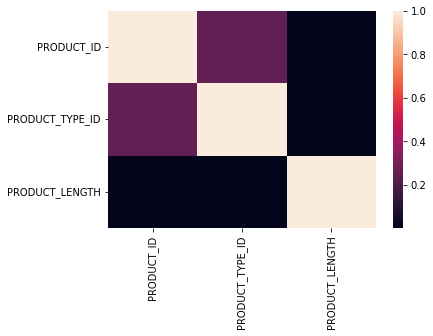

In [28]:
#plot the correlation matrix
corr=train_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

##### *Thus we can exlude PRODUCT_ID while training as it has unique values and has no correlation with PRODUCT_LENGTH*

In [31]:
#find if there are any repeated values in PRODUCT_TYPE_ID column
if train_df['PRODUCT_TYPE_ID'].value_counts().shape[0]==train_df.shape[0]:
    print('No repeated values')
else:
    display(train_df['PRODUCT_TYPE_ID'].value_counts())

1        121199
12064     57554
0         50505
123       31527
6104      29690
          ...  
7239          1
12536         1
4114          1
3229          1
4505          1
Name: PRODUCT_TYPE_ID, Length: 12907, dtype: int64

In [49]:
#create a dataframe df1 with only the columns PRODUCT_TYPE_ID, PRODUCT_LENGTH, grouped by PRODUCT_TYPE_ID 
train_df[['PRODUCT_TYPE_ID','PRODUCT_LENGTH']].groupby('PRODUCT_TYPE_ID').agg(['min','max','mean','median',
'count','std','var','skew'])

PRODUCT_LENGTH                                               \
                           min        max         mean       median   count   
PRODUCT_TYPE_ID                                                               
0                       1.0000  9000000.0  1285.765266   606.000000   50505   
1                       1.5748   150787.1   675.236905   600.000000  121199   
2                       2.0000   300000.0  1520.900820   790.578740     664   
3                       1.0000    53149.5   473.207853   547.243000    4265   
4                       1.0000  1968500.0  1312.152903   600.000000    6877   
...                        ...        ...          ...          ...     ...   
13416                 100.0000     4000.0  1297.100536  1299.212597     101   
13417                 525.0000     1820.0  1172.500000  1172.500000       2   
13418                1100.0000     1300.0  1233.333333  1300.000000       3   
13419                 100.0000     3000.0   881.428571   700.000000      28   
13420                 100.0000     3594.0  1215.568898   945.000000       8   

                                                         
                          std           var        skew  
PRODUCT_TYPE_ID                                          
0                46186.615655  2.133203e+09  161.181076  
1                 1216.430345  1.479703e+06   83.278206  
2                11712.716451  1.371877e+08   25.058414  
3                  873.573087  7.631299e+05   51.516347  
4                24034.953998  5.776790e+08   79.878746  
...                       ...           ...         ...  
13416              520.907855  2.713450e+05    1.250418  
13417              915.703282  8.385125e+05         NaN  
13418              115.470054  1.333333e+04   -1.732051  
13419              716.600588  5.135164e+05    1.111049  
13420             1094.226716  1.197332e+06    1.640423  

[12907 rows x 8 columns]

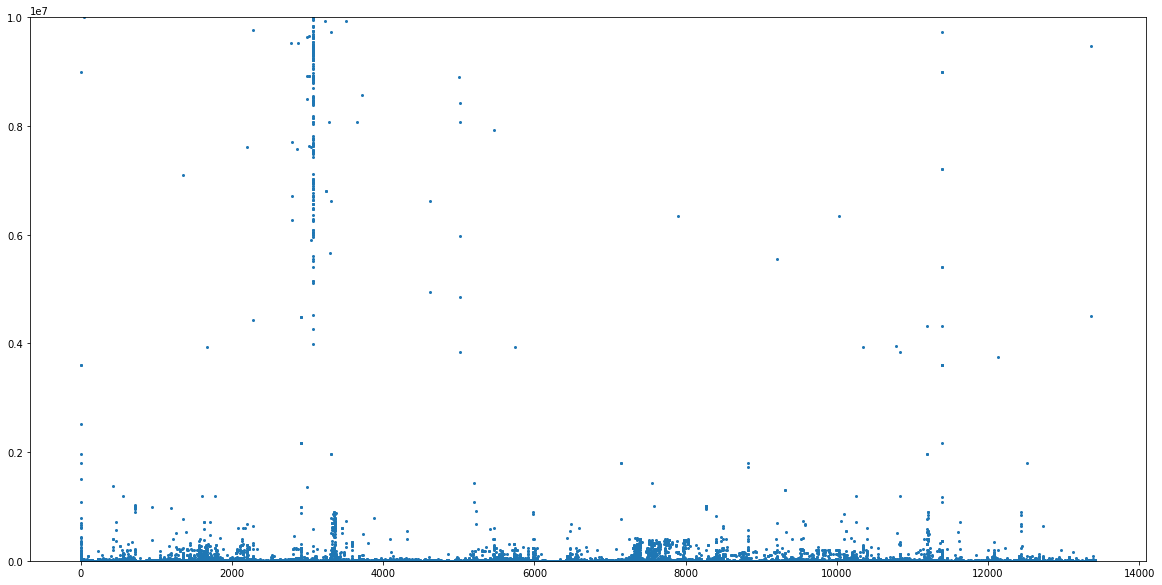

In [79]:
#plot PRODUCT_LENGTH and PRODUCT_TYPE_ID with PRODUCT_TYPE_ID as the x-axis and PRODUCT_LENGTH as the y-axis using matplotlib; exclude outliers in y axis
#set upper limit of y axis to 0.25
#plot scatter plot
plt.figure(figsize=(20,10))
plt.scatter(train_df['PRODUCT_TYPE_ID'],train_df['PRODUCT_LENGTH'],s=4)
plt.ylim(0,1*10**7)
plt.show()

##### *We can thus decide to drop PRODUCT_TYPE_ID as well*

In [91]:
#identify the percentage of number of missing values in each column
train_df.isnull().sum()/train_df.shape[0]*100

PRODUCT_ID          0.000000
TITLE               0.000537
BULLET_POINTS      37.419086
DESCRIPTION        51.634320
PRODUCT_TYPE_ID     0.000000
PRODUCT_LENGTH      0.000000
dtype: float64

##### *Since percentage of bullet points is still quite high, we cannot exclude it from training*